In [36]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [6]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [9]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Your data as a string
data = """coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.5184,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.8889,186.77418,101.96023
tether,-0.21173,0.04935,0.0064,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.2396,27.49919,-12.66408
bitcoin-cash-sv,0.9253,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082
crypto-com-chain,0.61209,-5.67151,-8.53948,-17.44782,-16.476,226.70782,305.05908
usd-coin,-0.17825,-0.11871,-0.00568,-0.16584,0.04271,-0.15691,-0.19205
eos,0.14477,-1.31177,1.13751,-4.63398,-30.16898,18.06111,-17.56753
monero,0.42961,15.78515,18.41097,38.95974,41.725,169.52147,141.04116
tron,0.07647,4.23886,1.40337,-12.60389,5.52545,132.88436,59.23821
tezos,-0.67316,8.95665,2.32062,-14.12663,-44.82248,43.42842,140.01279
okb,-2.727,-4.55389,-5.02662,-10.43847,-2.8312,39.95853,141.95791
stellar,-1.00843,2.07149,-1.08217,-8.12933,-30.80369,84.62157,13.80715
cosmos,-0.95103,16.08534,5.51074,4.57813,-7.2013,185.99786,82.43833
cdai,0.21169,0.0582,0.17076,-2.18147,0.65726,-0.3921,-0.28783
neo,0.49302,2.44243,-9.84803,-21.95472,13.51879,158.64773,131.29655
wrapped-bitcoin,1.10231,7.40537,6.55668,7.37557,-3.58772,83.9052,37.53424
leo-token,-0.13192,-1.34886,-7.02859,3.07525,-7.54455,16.40588,21.00263
huobi-token,-0.40818,1.61798,0.45488,-3.25488,-3.40689,42.23704,24.57164
nem,-0.8499,-0.8514,2.64844,-3.65382,82.86094,216.17761,200.71797
binance-usd,-0.10642,0.04726,0.05902,0.01843,0.09383,0.09959,0.13928
iota,0.41996,6.0683,-3.77714,-4.15281,-34.51894,95.02821,-3.98533
vechain,1.28766,-1.76352,-18.1589,-14.16831,-43.62359,269.70264,202.86827
zcash,-0.60897,10.3478,5.79179,7.37007,-20.54216,122.54767,82.88499
theta-token,-4.56089,-6.09456,-6.57354,31.43355,80.03112,882.65105,701.37599
dash,-1.06006,5.09387,0.51708,-7.7914,-26.2246,6.23435,-2.45897
ethereum-classic,-0.4595,3.05209,-1.26669,2.89572,-25.90799,10.39203,11.11094
ethlend,-13.52786,4.21266,-9.80075,-29.99499,2.13917,2227.92782,7852.0897
maker,-0.60285,8.154,-1.48854,16.7136,-18.61722,82.53544,10.65279
havven,-4.07216,4.33651,-13.29164,-20.84154,-39.42657,622.92465,678.78427
omisego,4.84033,6.82985,-13.21636,-9.11552,79.27505,585.26307,320.69054
celsius-degree-token,2.51323,0.60354,24.23919,140.7957,223.06437,1590.19149,2009.72217
ontology,-1.35845,-1.21399,-10.56222,-34.70548,-32.70004,54.76717,-12.65493
ftx-token,0.83416,7.10438,-0.20629,-10.56394,5.90295,57.4895,168.37251
true-usd,-0.06197,0.16642,0.10974,0.0309,0.25154,-0.08874,0.40617
digibyte,2.97084,0.67038,-7.31941,13.25354,-31.0903,482.58918,184.38014"""

# Split the data into lines and then into columns
lines = data.strip().split('\n')
data_list = [line.split(',') for line in lines]

# Create a DataFrame from the list of lists
df = pd.DataFrame(data_list[1:], columns=data_list[0])

# Convert relevant columns to float
for col in df.columns[1:]:
    df[col] = df[col].astype(float)

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the numerical columns (excluding 'coin_id')
scaled_data = scaler.fit_transform(df.drop(columns=['coin_id']))

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[1:])

# Copy the crypto names from the original DataFrame
scaled_df['coin_id'] = df['coin_id']

# Set the coin_id column as index
scaled_df.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [109]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 11)

In [110]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_scaled
    kmeans.fit(scaled_data)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

C:\Users\Mary Du\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mary Du\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mary Du\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mary Du\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

In [111]:
print(inertia_values)

[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.22036416927935, 52.82981853382919, 43.78643495414179, 37.52773961065439, 33.07092554993108, 28.9890732836795]


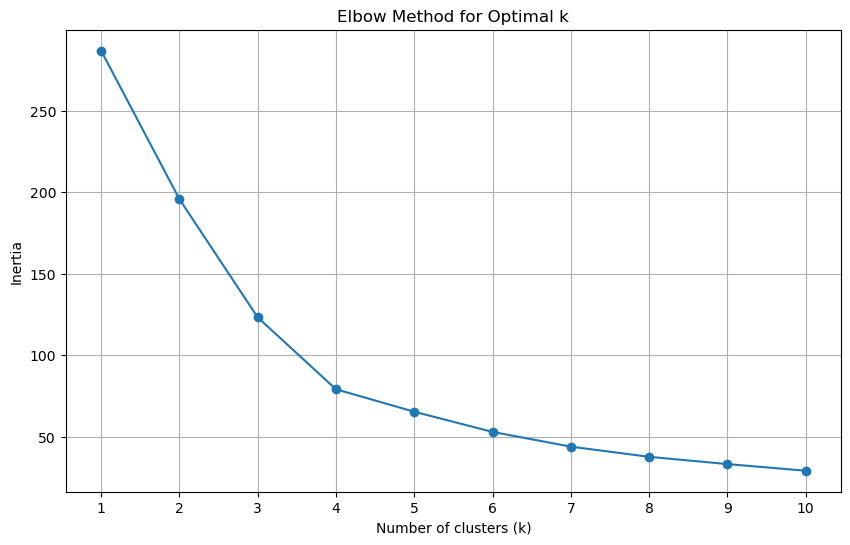

In [38]:
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({'k': k_values, 'inertia': inertia_values})

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Set x-ticks to be the k values
plt.grid()
plt.show()

In [40]:
# Identify the best value for k
# You can visually inspect the elbow in the plot or use some criteria to find it
best_k = elbow_df.iloc[elbow_df['inertia'].diff().abs().idxmax()]['k']
print(f'The best value for k is: {best_k}')

The best value for k is: 2.0


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 2.0 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialise the K-Means model using the best value for k
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)

In [12]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(scaled_df)

In [56]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans.predict(scaled_df)

# Print the resulting array of cluster values.
print("Cluster values:", clusters)

Cluster values: [3 3 0 0 6 7 7 7 3 0 5 0 0 6 0 3 0 0 7 0 5 3 0 0 0 0 0 5 3 8 0 0 1 3 9 4 2
 5 3 0 0]


In [58]:
# Create a copy of the scaled DataFrame
df_scaled_copy = pd.DataFrame(scaled_df, columns=scaled_df.columns[0:])

In [73]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['cluster'] = clusters

# Display the copy of the scaled DataFrame
df_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,6


In [61]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="K-means Clustering of Cryptocurrencies",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)"
)
# Display the plot
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimise Clusters with Principal Component Analysis.

In [80]:
scaled_df['coin_id'] = df['coin_id'].values

In [81]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [82]:
# Use the PCA model with `fit_transform` to reduce the original scaled Dataframe
# down to three principal components.
pca_result = pca.fit_transform(scaled_df.drop(columns=['coin_id']))

# View the scaled PCA data
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df['coin_id'] = scaled_df['coin_id']

In [84]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

# Display the PCA DataFrame and the explained variance
print("PCA DataFrame:")
print(pca_df)

print("\nExplained Variance for each Principal Component:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.4f}")

print(f"\nTotal Explained Variance: {total_explained_variance:.4f}")

PCA DataFrame:
         PC1       PC2       PC3 coin_id
0  -0.600667  0.842760  0.461595     NaN
1  -0.458261  0.458466  0.952877     NaN
2  -0.433070 -0.168126 -0.641752     NaN
3  -0.471835 -0.222660 -0.479053     NaN
4  -1.157800  2.041209  1.859715     NaN
5  -0.516534  1.388377  0.804071     NaN
6  -0.450711  0.517699  2.846143     NaN
7  -0.345600  0.729439  1.478013     NaN
8  -0.649468  0.432165  0.600303     NaN
9  -0.759014 -0.201200 -0.217653     NaN
10 -0.248198 -1.376252 -1.462026     NaN
11 -0.438408 -0.175337 -0.663388     NaN
12 -0.693425 -0.473815 -0.527597     NaN
13  0.060499  2.909404  1.498571     NaN
14 -0.393352 -0.108192 -0.012756     NaN
15 -0.796176 -0.494409  1.082812     NaN
16  0.064075 -1.269825 -1.098829     NaN
17 -0.489015 -0.732719 -0.062543     NaN
18 -0.306272  0.703415  1.714224     NaN
19 -0.513528 -0.142802 -0.656566     NaN
20 -0.362120 -0.986914 -0.728752     NaN
21 -0.604265  0.827398  0.439316     NaN
22 -0.413296 -0.674115 -1.076628     NaN
2

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 0.8950 

In [85]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original scaled DataFrame
pca_df['coin_id'] = scaled_df['coin_id'].values

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [113]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 11)

In [114]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(pca_df)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


C:\Users\Mary Du\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mary Du\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mary Du\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mary Du\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

In [115]:
print(inertia_values)

[256.87408556789234, 168.8118963068521, 93.77462568057297, 49.665496651797355, 37.878747033462474, 27.618971787957427, 21.182775862957335, 17.091636643864746, 13.667065268858192, 10.559357562793435]


In [116]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({'k': k_values, 'inertia': inertia_values})

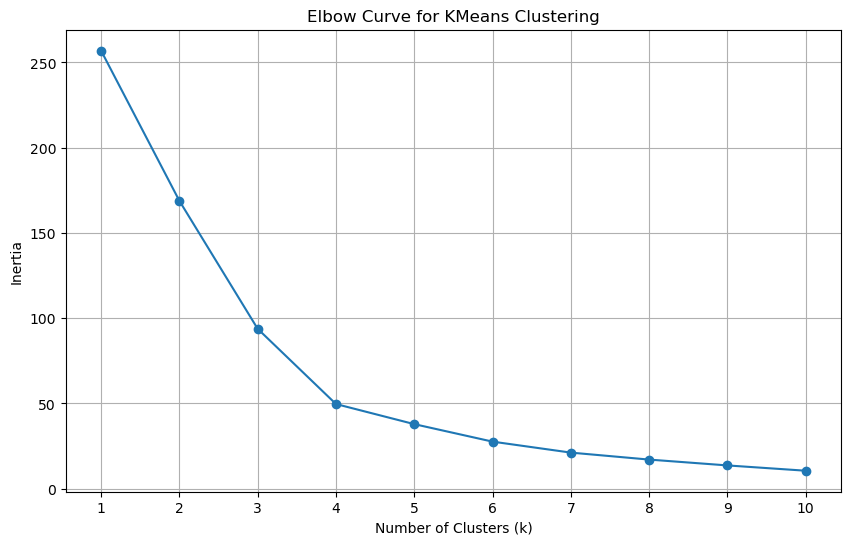

The best value for k using PCA data is: 10


In [117]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

best_k = elbow_df.loc[elbow_df['inertia'].diff().idxmax(), 'k']
print("The best value for k using PCA data is:", best_k)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 10


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: Yes and A higher k value in PCA suggests that the relationships between the cryptocurrencies are more complex than initially indicated by the original feature set. 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [118]:
# Initialise the K-Means model using the best value for k
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)

In [119]:
# Fit the K-Means model using the scaled PCA DataFrame
kmeans.fit(pca_df)

C:\Users\Mary Du\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mary Du\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [120]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print("Cluster values:", clusters)

Cluster values: [7 7 0 0 6 7 3 3 7 9 4 0 0 6 9 9 4 9 3 0 4 7 0 0 0 0 9 4 7 5 9 9 1 7 8 0 2
 4 9 0 0]


In [121]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['cluster'] = clusters

# Display the copy of the scaled PCA DataFrame
df_pca_copy['coin_id'] = scaled_df['coin_id'].values

df_pca_copy.head()

,PC1,PC2,PC3,cluster,coin_id
0,-0.600667,0.842760,0.461595,7,bitcoin
1,-0.458261,0.458466,0.952877,7,ethereum
2,-0.433070,-0.168126,-0.641752,0,tether
3,-0.471835,-0.222660,-0.479053,0,ripple
4,-1.157800,2.041209,1.859715,6,bitcoin-cash


In [122]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Colour the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',  # Color by cluster
    hover_cols=['coin_id'],  # Show crypto name on hover
    title='K-Means Clustering of Cryptocurrencies in PCA Space',
    cmap='viridis',  # Color map for clusters
    size=100,  # Size of points
    alpha=0.7,  # Transparency
)

# Show the scatter plot
scatter_plot

:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

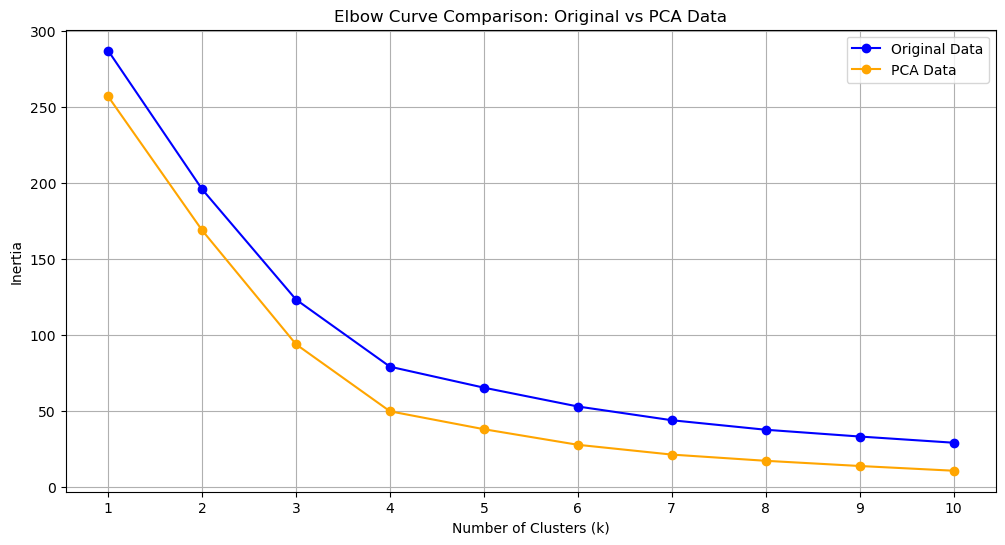

In [125]:
# Assuming you have the inertia values stored from previous steps
# Assuming you have the inertia values stored from previous steps
inertia_original = [
    287.0, 195.82, 123.19, 79.02, 65.22, 
    52.83, 43.79, 37.53, 33.07, 28.99
]
inertia_pca = [
    256.87, 168.81, 93.77, 49.67, 37.88, 
    27.62, 21.18, 17.09, 13.67, 10.56
]

# Create a composite Elbow curve plot
plt.figure(figsize=(12, 6))

# Plot original inertia
plt.plot(range(1, len(inertia_original) + 1), inertia_original, marker='o', label='Original Data', color='blue')

# Plot PCA inertia
plt.plot(range(1, len(inertia_pca) + 1), inertia_pca, marker='o', label='PCA Data', color='orange')

plt.title('Elbow Curve Comparison: Original vs PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, max(len(inertia_original), len(inertia_pca)) + 1))
plt.legend()
plt.grid()
plt.show()

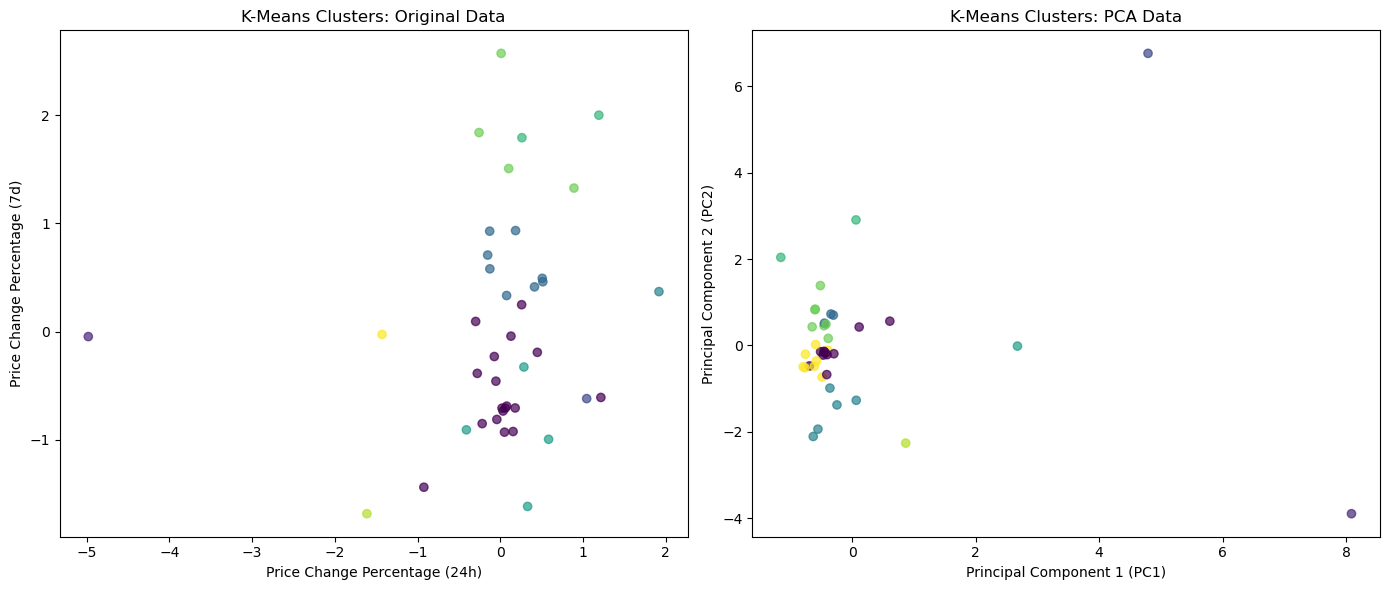

In [126]:
# Composite plot to contrast the clusters
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original Data Clusters
axs[0].scatter(df_scaled_copy['price_change_percentage_24h'], df_scaled_copy['price_change_percentage_7d'], 
                c=df_scaled_copy['cluster'], cmap='viridis', alpha=0.7)
axs[0].set_title('K-Means Clusters: Original Data')
axs[0].set_xlabel('Price Change Percentage (24h)')
axs[0].set_ylabel('Price Change Percentage (7d)')

# PCA Data Clusters
axs[1].scatter(df_pca_copy['PC1'], df_pca_copy['PC2'], 
                c=df_pca_copy['cluster'], cmap='viridis', alpha=0.7)
axs[1].set_title('K-Means Clusters: PCA Data')
axs[1].set_xlabel('Principal Component 1 (PC1)')
axs[1].set_ylabel('Principal Component 2 (PC2)')

plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:  Impact of Fewer Features:
  * Simplification: Reducing features simplifies the data and may help highlight broader patterns. However, it can also lead to loss of important information.
  * Computational Efficiency: Fewer features often lead to faster computations, which can be beneficial for larger datasets.
  * Risk of Oversimplification: While PCA can help identify significant trends, it may obscure subtle nuances that could be critical for meaningful cluster differentiation.